In [ ]:
using Pkg
Plg.add("Plots)

In [ ]:
using Posets
using DelimitedFiles
using Plots
using Combinatorics

# Método $m^2$ y $m^3$

 Abajo se introducen los rankings de Universidades con 10 nodos.

In [3]:
rankingsuniversidades_10nodos=
[
[3,7,6,8,1,4,5,2,9,10],
[3,7,6,4,8,1,5,9,2,10],
[3,7,6,8,4,1,5,2,9,10],
[7,3,6,8,4,1,5,2,10,9],
[3,7,6,8,4,1,5,2,9,10],
[3,7,6,8,4,1,5,2,9,10],
[3,7,6,4,8,1,5,2,9,10],
[3,7,6,8,4,1,5,2,9,10],
[3,7,6,8,4,1,5,2,9,10],
[3,7,6,8,4,1,5,2,9,10],
[3,7,6,8,4,1,5,2,9,10],
[3,7,6,8,4,1,5,2,9,10],
[3,7,6,8,4,1,5,2,9,10],
[3,7,6,8,4,1,5,2,9,10]
];

Se calcula el poset $m^2$, i.e., el poset con $\max$ y $\min$.

__Nota__ el _keyword_ `alter` se refiere a utilizar el valor lineal. Si se usa `false` en substitución de `true` se usa el inverso $1/\mathrm{pos}$.

In [4]:
poset_m² = m²(rankingsuniversidades_10nodos; alter=true) |> pareja_matrizadyacencia;

Se calculan las correlaciones de Pearson entre extensiones lineales ---seleccionadas uniformemente--- de poset $m^2$
y los rankings de las universidades.

In [5]:
listacorrelaciones2 = Float64[]

for i in 1:5000
    linext_aleatoria_inter =  poset_m² |> x->caminatale(x, 200)
    listacorrelaciones2 = [listacorrelaciones2..., [pearson(linext_aleatoria_inter, rankingsuniversidades_10nodos[i]) for i in 1:14]... ]
end

Se hace un histograma de las correlaciones. Se aprecian valores muy altos.

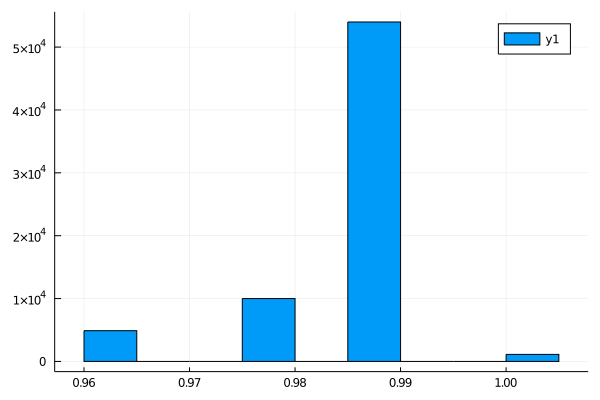

In [6]:
histogram(listacorrelaciones2, bins = 10)

A continuación, se hace el mismo análisis pero utilizando el poset $m^3$, i.e., no sólo se utiliza el máximo y mínimo sino que adcionalmente se usa la mediana.

In [7]:
poset_m³ = m³(rankingsuniversidades_10nodos; alter=true) |> pareja_matrizadyacencia;

In [8]:
listacorrelaciones2 = Float64[]

for i in 1:5000
    linext_aleatoria_inter =  poset_m³ |> x->caminatale(x, 200)
    listacorrelaciones2 = [listacorrelaciones2..., [pearson(linext_aleatoria_inter, rankingsuniversidades_10nodos[i]) for i in 1:14]... ]
end

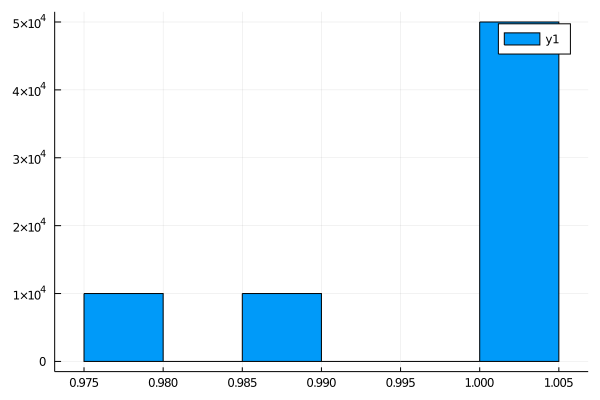

In [9]:
histogram(listacorrelaciones2, bins = 10)

Hay que notar que este analisis por si solo no  basta. Por ejemplo, arriba se ve una gran concordancia entre los rankings de las universidades y las extensiones lineales de los Posets $m^2$ y $m^3$